<a href="https://colab.research.google.com/github/DARoSLab/CS403_2025-Spring/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 5 Cart-pole Dynamics Simulation**

The goal of HW 5 is to create a dynamics simulation of a cart-pole system (1) by yourself, and (2) by using Mujoco simulator.

<img src="https://github.com/DARoSLab/CS403_2025-Spring/blob/main/Figures/cart-pole.png?raw=true" width="450">

Use a generalized coordinate given in the figure. We give forward kinematics of important places of the system.

\begin{align}
rA= \begin{pmatrix}
    x \\
    0 \\
    0
     \end{pmatrix},  &
\ rB = \begin{pmatrix}
    x + ccos(\theta)  \\
    csin(\theta) \\
    \theta
     \end{pmatrix}
\\[10pt]
\implies vA= \begin{pmatrix}
    \dot{x} \\
    0 \\
    0
     \end{pmatrix}, &
\ vB = \begin{pmatrix}
    \dot{x} -c\dot{\theta}sin(\theta)  \\
    c\dot{\theta}cos(\theta) \\
    \dot{\theta}
     \end{pmatrix}
\\[10pt]
\implies aA= \begin{pmatrix}
    \ddot{x} \\
    0 \\
    0
     \end{pmatrix}, &
\ aB = \begin{pmatrix}
    \ddot{x} -c\ddot{\theta}sin(\theta)-c\dot{\theta}^2cos(\theta)  \\
    c\ddot{\theta}cos(\theta) - c\dot{\theta}^2sin(\theta) \\
    \ddot{\theta}
     \end{pmatrix}
\\[10pt]
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

# **Q.1 Dynamics of a cart-pole system**

To make a dynamics simulation, we first need to complete the formula:

$M \ddot{q} + b (q, \dot{q}) + g(q) = \begin{pmatrix} f \\ \tau \end{pmatrix} $.

As a first step, identify $M$ (Mass matrix), $b$ (Coriolis and Centripetal force), and $g$ (Gravitational force).

## Q.1.(a) [20 pts] Dynamics function
Based on the given template code, complete the function returning the acceleration of the generalized coordinate:

$\ddot{q} = \begin{pmatrix}
\ddot{x} \\ \ddot{\theta}
\end{pmatrix} = M^{-1}\left( u - b -g \right)$

In [ ]:
def dynamics(q, u, params):
  m1, m2, I2, c, g = params
  x, th, xdot, thdot  = q.tolist()

  # Write your code here :
  # define b (coriolis and centripetal), g (gravitational force), and M (mass matrix)
  # Tehn compute acceleration (qddot)

  # .........................................
  return qddot

In [ ]:
# Test function: No need to change
def test_dynamics():
  m1 = 0.5
  m2 = 0.5
  I2 = 1
  c = 0.2
  g = 9.81
  params = [m1, m2, I2, c, g]
  test_cases = np.array([[0.0, np.pi/4, 0.0, 0.0],
                [0.5, -np.pi/4, 0.0, 0.0],
                [0.0, 0, 0.5, 0.0],
                [0.0, 0, 0.0, 5],
                ])
  soln = np.array([[-0.04832512, -0.68342045],
                   [ 0.04832512, -0.68342045],
                   [ 0.,         -0.96176471],
                   [ 2.5,        -0.96176471]])
  u = np.array([0, 0])
  res = np.zeros((4, 2))
  for i, q in enumerate(test_cases):
    res[i, :] = dynamics(q, u, params)
  assert np.allclose(res, soln), f"your dynamics implementation is not correct: your result {res} != solution: \n {soln}"
  print('Your implementation is correct!!')
  test_dynamics()

## Q 1.(b) [15 pts] Dynamics simulation

Complete the following function that computes state trajectory based on the dynamics function we implemented in Q.1 (a).

In [ ]:
def simulate_cartpole(x0, params, tf=1.0, dt=0.005):
  m1, m2, I2, c, g = params
  num_step = int(np.floor(tf/dt));
  tspan = np.linspace(0, tf, num_step);
  x_out = np.zeros((4,num_step));
  x_out[:,0] = x0;

  for i in range(num_step-1):
      u = np.zeros(2).T # put zero since there is no motor input for Q.1.

      # Write your code: update the sequence of state, position and velocity, by utilizing the dynamcs function
      # Note: use semi-implicit Euler integration

      # ...............................
  return x_out

In [ ]:
# Cart-Pole visualization function: No need to change
def visualize_cartpole(q_hist, dt=0.001, num_frames=100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)
  c_l = 0.4
  p_l = 0.4
  cart, = ax.plot([-0.5*c_l, 0.5*c_l], [0, 0], 'b', lw=10)
  pole, = ax.plot([0, 0], [0, p_l], 'r', lw=10)

  txt_title = ax.set_title('')

  ax.set_xlim(( -1, 1))
  ax.set_ylim((-0.7, 1.3))
  txt_title = ax.set_title('')
  interval = len(q_hist)//num_frames
  def drawFrame(k):
    k = interval*k
    x, theta = q_hist[k]

    rA = [x, 0]
    rC = [x + p_l*np.cos(theta), p_l*np.sin(theta)]
    cart.set_data([x-0.5*c_l, x+0.5*c_l], [0, 0])
    pole.set_data([rA[0], rC[0]], [rA[1], rC[1]])
    txt_title.set_text(f't = {dt*k:.2f} sec')
    return cart, pole
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [ ]:
# Use the given parameters: No need to change
m1 = 0.5
m2 = 0.5
I2 = 1
c = 0.2
g = 9.81
dt = 0.002
tf = 10.0
params = [m1, m2, I2, c, g]

In [ ]:
# Simulation and animation code: No need to change
x0 = np.array([0.0, np.pi/4, 0.0, 0.0]).T;
x_out = simulate_cartpole(x0, params, tf=tf, dt=dt)
anim = visualize_cartpole(x_out[:2, :].T, dt=dt, num_frames=50)
plt.close()
HTML(anim.to_html5_video())

## Q.1.(c) [10 pts] Kinetic and Potential Energy

Plot the kinetic, potential, and total energy of the system.

In [ ]:
def kinetic_energy(q, params):
  m1, m2, I2, c, g = params

  # Write your code here: complete the function return the profile of kinetic energy

  # .......................................................
  return T

def potential_energy(q, params):
  m1, m2, I2, c, g = params

  # Write your code: complete the function return the profile of kinetic energy

  #.................................................
  return P

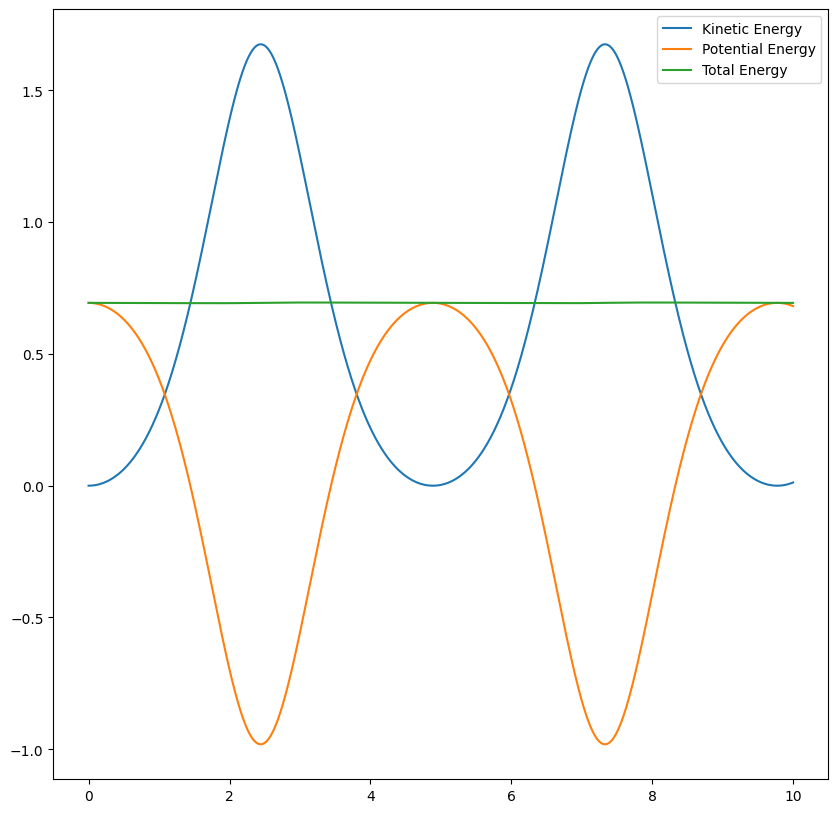

In [ ]:
# Write your code: Kinematic, potential, and total energy plot

#....................................................
plt.show()

## Q.1.(d) [10 pts] Energy profile analysis

Explain the meaning of energy profiles by correlating them with the system's behavior.

Your answer:

# **Q.2 Dynamics of a cart-pole system (Mujoco)**

You will implement the same system using Mujoco simulator, then compare with the one you maded above.

In [ ]:
!pip install mujoco

In [ ]:
#Import packages for plotting and creating graphics
import time
import itertools
import numpy as np
from typing import Callable, NamedTuple, Optional, Union, List

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

import mujoco

Installing mediapy:
Setting environment variable to use GPU rendering:
env: MUJOCO_GL=egl


## Q.2.(a) [15 pts] XML file

The following code is an XML file defining a cart-pole system. Most parts are correct, but the mass and inertia parameters differ from the system implemented above. Please identify those parameters and update them to match the previous system properties.
(The parameters for the cart-pole that you used are: $m_1 = 0.5, m_2 = 0.5, I_2 = 1, c = 0.2$.)

*Feel free to use Google, Gemini, or GPT to understand XML syntax. The official MuJoCo XML documentation can be found at: https://mujoco.readthedocs.io/en/stable/XMLreference.html*

In [ ]:
# System definition (xml file)
xml_cart_pole = """
<mujoco model='cartpole'>
  <option timestep='0.005' gravity="0 0 -9.81"/>
  <compiler angle="radian"/>

  <visual>
    <global offwidth="700" offheight="400"/>  # Set the offscreen framebuffer height
  </visual>
  <worldbody>
    <light name="spotlight" mode="fixed" target="cart" pos="0 -1 2"/>

    <camera name='fixed' pos='0 -2.5 0' quat='0.707 0.707 0 0'/>
    <geom name='floor' pos='0 0 -1' size='4 4 4' type='plane' />

    <body name='cart' pos='0 0 0'>
      <joint name='slider' type='slide' pos='0 0 0' axis='1 0 0' range='-1.0 1.0' />
      <geom name='cart' type='box' pos='0 0 0' size='0.25 0.1 0.05' rgba='0.7 0.7 0 1' />
      <inertial pos="0 0 0" quat="1 0 0 0" mass="1.5" diaginertia="0.05 0.03 0.02"/>

      <body name='pole' pos='0 0 0'>
        <joint name='hinge' type='hinge' pos='0 0 0' axis='0 1 0'/>
        <geom name='cpole' type='capsule' fromto='0 0 0 0 0 0.4' size='0.045 0.3' rgba='0 0.7 0.7 1' />
        <inertial pos="0 0 0.3" quat="1 0 0 0" mass="1.5" diaginertia="0.6 0.6 0.6"/>
      </body>
    </body>
  </worldbody>

  <actuator>
    <motor name='slide' joint='slider' ctrllimited='true' ctrlrange='-100 100' gear="1"/>
  </actuator>

  <keyframe>
    <key name="hanging_down" qpos="0 0.7854" qvel="0 0" />
  </keyframe>

</mujoco>
"""

In [ ]:
# Make model, data, and renderer: No need to change
mj_model = mujoco.MjModel.from_xml_string(xml_cart_pole)
mj_data = mujoco.MjData(mj_model)
renderer = mujoco.Renderer(mj_model, width=700, height=400)

# enable joint visualization option: No need to change
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = False

duration = 7.0  # (seconds)
framerate = 30  # (Hz)

frames = []
mujoco.mj_resetDataKeyframe(mj_model, mj_data, 0)

while mj_data.time < duration:

  mujoco.mj_step(mj_model, mj_data)
  if len(frames) < mj_data.time * framerate:
    renderer.update_scene(mj_data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video
media.show_video(frames, fps=framerate)

## Q.2.(b) [10 pts] Kinetic and Potential Energy

Plot the kinetic, potential, and total energy of the system.
Compare the energy plots with the ones you obtained from your custom simulator.

In [ ]:
# plot Kinetic and Potential energy computed from Mujoco
# along with the data you found in your custom simulator
mujoco.mj_resetDataKeyframe(mj_model, mj_data, 0)
mujoco.mj_step(mj_model, mj_data)

Inertia_Mtx = np.zeros((2,2))
mujoco.mj_fullM(mj_model, Inertia_Mtx, mj_data.qM)
pole_mass = mj_data.crb[2][9]
grav = 9.81

kin_energy_mujoco = []
pot_energy_mujoco = []
total_energy_mujoco = []
time_mujoco = []

while mj_data.time < tf:
  mj_data.ctrl = 0;
  # Write your code to compute kinetic, position, and total energy

  #.........................................................
  time_mujoco.append(mj_data.time)

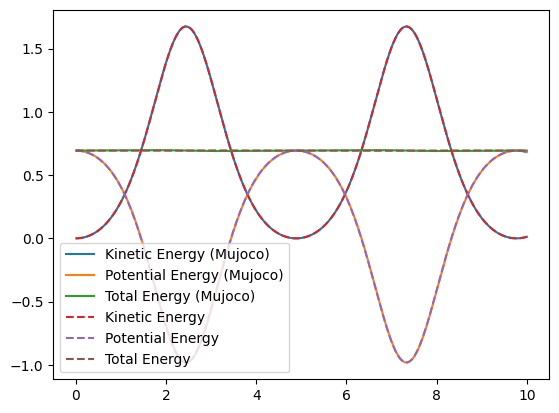

In [ ]:
# Plot: No need to change
plt.plot(time_mujoco, kin_energy_mujoco, label='Kinetic Energy (Mujoco)')
plt.plot(time_mujoco, pot_energy_mujoco, label='Potential Energy (Mujoco)')
plt.plot(time_mujoco, total_energy_mujoco, label='Total Energy (Mujoco)')

plt.plot(ts, ke_hist, linestyle='--', label='Kinetic Energy')
plt.plot(ts, pe_hist, linestyle='--', label='Potential Energy')
plt.plot(ts, pe_hist+ke_hist, linestyle='--', label='Total Energy')

plt.legend()
plt.show()

## Q.2.(c) [10 pts] Trajectory comparison

Plot x position of cart and joint angle of pendulum, and compare them with the ones computed from your simulator. Then, analyze the results.

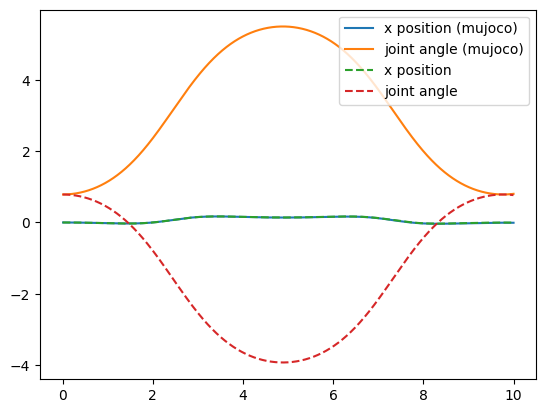

In [ ]:
mujoco.mj_resetDataKeyframe(mj_model, mj_data, 0)
mujoco.mj_step(mj_model, mj_data)

x_pos_mujoco = []
joint_angle_mujoco = []
time_mujoco = []

while mj_data.time < tf:
  mj_data.ctrl = 0;
  # Write your code here

  #.........................................................
  time_mujoco.append(mj_data.time)

plt.plot(time_mujoco, x_pos_mujoco, label='x position (mujoco)' )
plt.plot(time_mujoco, joint_angle_mujoco, label='joint angle (mujoco)' )

plt.plot(ts, x_out[0,:], linestyle='--', label='x position' )
plt.plot(ts, x_out[1,:], linestyle='--', label='joint angle' )

plt.legend()
plt.show()

## Q.2. (d) [10 pts] Do you get the same results? If not, please explain why:


Your answer: